In [2]:
"""
Lab 10: Diffie-Hellman Key Exchange with Man-in-the-Middle Attack
Demonstrates secure exchange vs MITM attack
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

print("="*70)
print("DIFFIE-HELLMAN KEY EXCHANGE WITH MAN-IN-THE-MIDDLE ATTACK")
print("="*70)



DIFFIE-HELLMAN KEY EXCHANGE WITH MAN-IN-THE-MIDDLE ATTACK


In [3]:
# =============================================================================
# PART 1: STANDARD DIFFIE-HELLMAN (NO ATTACK)
# =============================================================================

class DiffieHellman:
    """Standard Diffie-Hellman implementation"""
    
    def __init__(self, name, p, g):
        """
        Initialize entity with prime p and generator g
        """
        self.name = name
        self.p = p  # Prime modulus
        self.g = g  # Generator
        self.private_key = None
        self.public_key = None
        self.shared_secret = None
    
    def generate_private_key(self, key=None):
        """Generate random private key"""
        if key is None:
            self.private_key = np.random.randint(2, self.p - 1)
        else:
            self.private_key = key
        return self.private_key
    
    def generate_public_key(self):
        """Generate public key: g^private mod p"""
        if self.private_key is None:
            raise ValueError("Private key not generated")
        self.public_key = pow(self.g, self.private_key, self.p)
        return self.public_key
    
    def compute_shared_secret(self, other_public_key):
        """Compute shared secret: other_public^private mod p"""
        self.shared_secret = pow(other_public_key, self.private_key, self.p)
        return self.shared_secret
    
    def __str__(self):
        return (f"{self.name}:\n"
                f"  Private key: {self.private_key}\n"
                f"  Public key: {self.public_key}\n"
                f"  Shared secret: {self.shared_secret}")



In [4]:
# =============================================================================
# SCENARIO 1: NORMAL KEY EXCHANGE (NO ATTACK)
# =============================================================================

print("\n" + "="*70)
print("SCENARIO 1: NORMAL DIFFIE-HELLMAN (NO ATTACK)")
print("="*70)

# Public parameters (shared by everyone)
p = 23  # Prime number
g = 5   # Generator

print(f"\n📢 Public Parameters:")
print(f"  Prime (p): {p}")
print(f"  Generator (g): {g}")

# Create Alice and Bob
alice = DiffieHellman("Alice", p, g)
bob = DiffieHellman("Bob", p, g)

# Step 1: Generate private keys
alice.generate_private_key(6)  # Alice's secret
bob.generate_private_key(15)   # Bob's secret

print(f"\n🔐 Private Keys Generated:")
print(f"  Alice's private key: {alice.private_key} (secret!)")
print(f"  Bob's private key: {bob.private_key} (secret!)")

# Step 2: Generate public keys
alice_public = alice.generate_public_key()
bob_public = bob.generate_public_key()

print(f"\n📤 Public Keys Exchanged:")
print(f"  Alice sends: {alice_public}")
print(f"  Bob sends: {bob_public}")

# Step 3: Compute shared secrets
alice_secret = alice.compute_shared_secret(bob_public)
bob_secret = bob.compute_shared_secret(alice_public)

print(f"\n🔑 Shared Secrets Computed:")
print(f"  Alice's shared secret: {alice_secret}")
print(f"  Bob's shared secret: {bob_secret}")
print(f"\n✅ Keys match: {alice_secret == bob_secret}")




SCENARIO 1: NORMAL DIFFIE-HELLMAN (NO ATTACK)

📢 Public Parameters:
  Prime (p): 23
  Generator (g): 5

🔐 Private Keys Generated:
  Alice's private key: 6 (secret!)
  Bob's private key: 15 (secret!)

📤 Public Keys Exchanged:
  Alice sends: 8
  Bob sends: 19

🔑 Shared Secrets Computed:
  Alice's shared secret: 2
  Bob's shared secret: 2

✅ Keys match: True


In [5]:
# =============================================================================
# SCENARIO 2: MAN-IN-THE-MIDDLE ATTACK
# =============================================================================

print("\n\n" + "="*70)
print("SCENARIO 2: MAN-IN-THE-MIDDLE ATTACK")
print("="*70)

# Create new instances
alice_mitm = DiffieHellman("Alice", p, g)
bob_mitm = DiffieHellman("Bob", p, g)
tom = DiffieHellman("Tom (Attacker)", p, g)

# Step 1: Alice and Bob generate private keys
alice_mitm.generate_private_key(6)
bob_mitm.generate_private_key(15)
tom.generate_private_key(10)  # Tom's private key

print(f"\n🔐 Private Keys:")
print(f"  Alice: {alice_mitm.private_key}")
print(f"  Bob: {bob_mitm.private_key}")
print(f"  Tom: {tom.private_key}")

# Step 2: Generate public keys
alice_public_mitm = alice_mitm.generate_public_key()
bob_public_mitm = bob_mitm.generate_public_key()
tom_public = tom.generate_public_key()

print(f"\n📤 Original Public Keys:")
print(f"  Alice generates: {alice_public_mitm}")
print(f"  Bob generates: {bob_public_mitm}")
print(f"  Tom generates: {tom_public}")

# Step 3: TOM INTERCEPTS AND REPLACES
print(f"\n🚨 TOM INTERCEPTS THE EXCHANGE!")
print(f"  - Alice sends {alice_public_mitm} → Tom intercepts and sends {tom_public} to Bob")
print(f"  - Bob sends {bob_public_mitm} → Tom intercepts and sends {tom_public} to Alice")

# Step 4: Compute shared secrets with Tom in the middle
alice_secret_mitm = alice_mitm.compute_shared_secret(tom_public)  # Alice thinks she's talking to Bob
bob_secret_mitm = bob_mitm.compute_shared_secret(tom_public)      # Bob thinks he's talking to Alice
tom_alice_secret = tom.compute_shared_secret(alice_public_mitm)   # Tom's secret with Alice
tom_bob_secret = tom.compute_shared_secret(bob_public_mitm)       # Tom's secret with Bob

print(f"\n🔑 Resulting Shared Secrets:")
print(f"  Alice's secret (with Tom): {alice_secret_mitm}")
print(f"  Bob's secret (with Tom): {bob_secret_mitm}")
print(f"  Tom's secret with Alice: {tom_alice_secret}")
print(f"  Tom's secret with Bob: {tom_bob_secret}")

print(f"\n❌ VERIFICATION:")
print(f"  Alice-Tom keys match: {alice_secret_mitm == tom_alice_secret} ✓")
print(f"  Bob-Tom keys match: {bob_secret_mitm == tom_bob_secret} ✓")
print(f"  Alice-Bob keys match: {alice_secret_mitm == bob_secret_mitm} ✗")





SCENARIO 2: MAN-IN-THE-MIDDLE ATTACK

🔐 Private Keys:
  Alice: 6
  Bob: 15
  Tom: 10

📤 Original Public Keys:
  Alice generates: 8
  Bob generates: 19
  Tom generates: 9

🚨 TOM INTERCEPTS THE EXCHANGE!
  - Alice sends 8 → Tom intercepts and sends 9 to Bob
  - Bob sends 19 → Tom intercepts and sends 9 to Alice

🔑 Resulting Shared Secrets:
  Alice's secret (with Tom): 3
  Bob's secret (with Tom): 6
  Tom's secret with Alice: 3
  Tom's secret with Bob: 6

❌ VERIFICATION:
  Alice-Tom keys match: True ✓
  Bob-Tom keys match: True ✓
  Alice-Bob keys match: False ✗



💾 Normal exchange saved as 'diffie_hellman_normal.png'


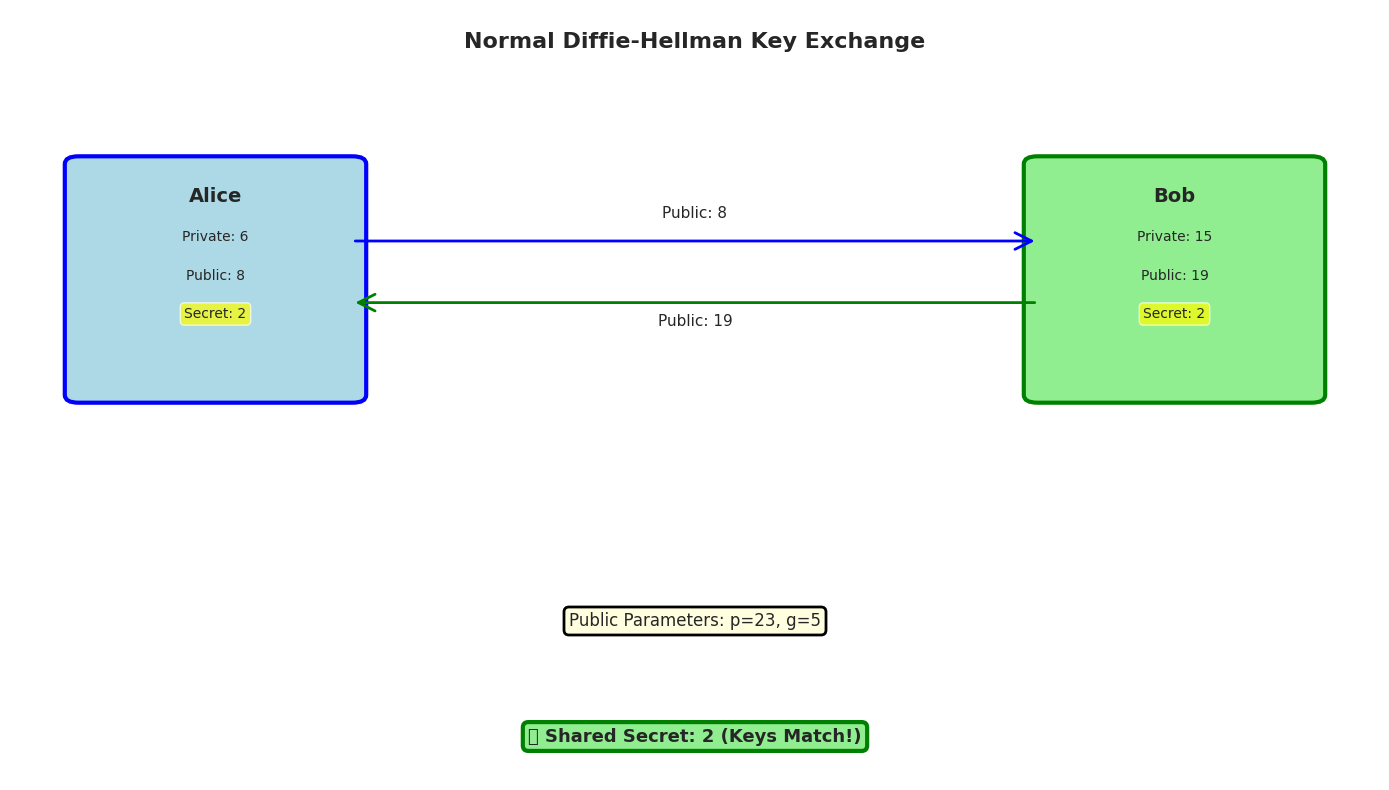

In [6]:
# =============================================================================
# VISUALIZATION 1: NORMAL KEY EXCHANGE
# =============================================================================

fig1, ax1 = plt.subplots(1, 1, figsize=(14, 8))
ax1.axis('off')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)

# Title
ax1.text(5, 9.5, 'Normal Diffie-Hellman Key Exchange', 
         fontsize=16, fontweight='bold', ha='center')

# Alice box
alice_box = FancyBboxPatch((0.5, 5), 2, 3, boxstyle="round,pad=0.1", 
                           edgecolor='blue', facecolor='lightblue', linewidth=3)
ax1.add_patch(alice_box)
ax1.text(1.5, 7.5, 'Alice', fontsize=14, fontweight='bold', ha='center')
ax1.text(1.5, 7, f'Private: {alice.private_key}', fontsize=10, ha='center')
ax1.text(1.5, 6.5, f'Public: {alice_public}', fontsize=10, ha='center')
ax1.text(1.5, 6, f'Secret: {alice_secret}', fontsize=10, ha='center', 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Bob box
bob_box = FancyBboxPatch((7.5, 5), 2, 3, boxstyle="round,pad=0.1", 
                         edgecolor='green', facecolor='lightgreen', linewidth=3)
ax1.add_patch(bob_box)
ax1.text(8.5, 7.5, 'Bob', fontsize=14, fontweight='bold', ha='center')
ax1.text(8.5, 7, f'Private: {bob.private_key}', fontsize=10, ha='center')
ax1.text(8.5, 6.5, f'Public: {bob_public}', fontsize=10, ha='center')
ax1.text(8.5, 6, f'Secret: {bob_secret}', fontsize=10, ha='center',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Arrows
arrow1 = FancyArrowPatch((2.5, 7), (7.5, 7), arrowstyle='->', 
                        mutation_scale=30, linewidth=2, color='blue')
ax1.add_patch(arrow1)
ax1.text(5, 7.3, f'Public: {alice_public}', fontsize=11, ha='center',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

arrow2 = FancyArrowPatch((7.5, 6.2), (2.5, 6.2), arrowstyle='->', 
                        mutation_scale=30, linewidth=2, color='green')
ax1.add_patch(arrow2)
ax1.text(5, 5.9, f'Public: {bob_public}', fontsize=11, ha='center',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Public parameters
ax1.text(5, 2, f'Public Parameters: p={p}, g={g}', fontsize=12, ha='center',
         bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='black', linewidth=2))

# Success message
ax1.text(5, 0.5, f'✅ Shared Secret: {alice_secret} (Keys Match!)', 
         fontsize=13, fontweight='bold', ha='center',
         bbox=dict(boxstyle='round', facecolor='lightgreen', edgecolor='green', linewidth=3))

plt.tight_layout()
plt.savefig('diffie_hellman_normal.png', dpi=300, bbox_inches='tight')
print("\n💾 Normal exchange saved as 'diffie_hellman_normal.png'")
plt.show()



💾 MITM attack saved as 'diffie_hellman_mitm.png'


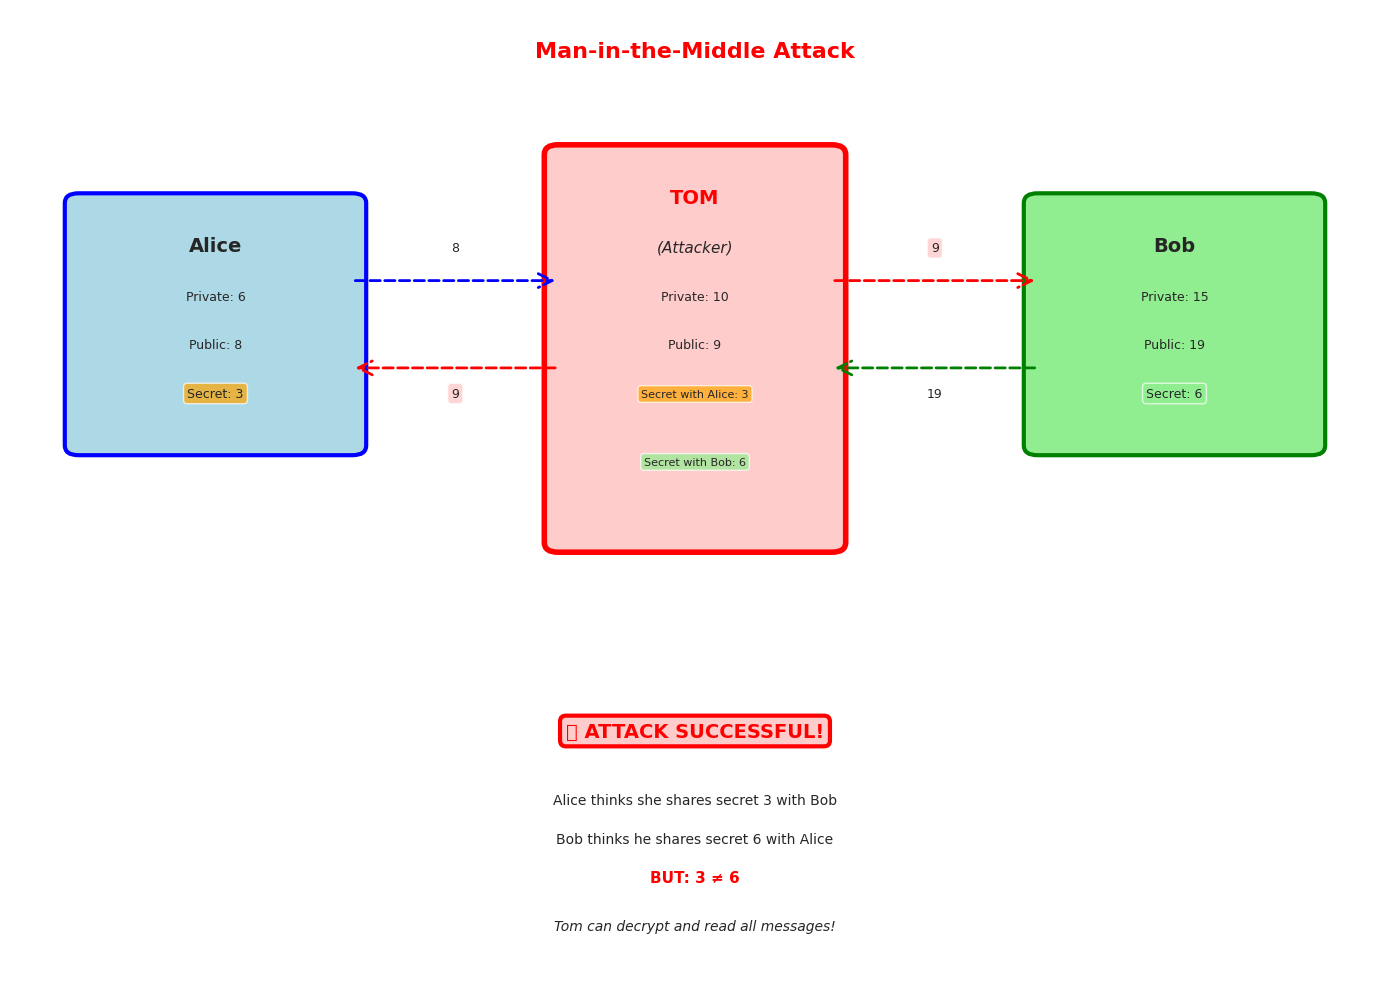

In [7]:
# =============================================================================
# VISUALIZATION 2: MAN-IN-THE-MIDDLE ATTACK
# =============================================================================

fig2, ax2 = plt.subplots(1, 1, figsize=(14, 10))
ax2.axis('off')
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)

# Title
ax2.text(5, 9.5, 'Man-in-the-Middle Attack', 
         fontsize=16, fontweight='bold', ha='center', color='red')

# Alice box
alice_box2 = FancyBboxPatch((0.5, 5.5), 2, 2.5, boxstyle="round,pad=0.1", 
                           edgecolor='blue', facecolor='lightblue', linewidth=3)
ax2.add_patch(alice_box2)
ax2.text(1.5, 7.5, 'Alice', fontsize=14, fontweight='bold', ha='center')
ax2.text(1.5, 7, f'Private: {alice_mitm.private_key}', fontsize=9, ha='center')
ax2.text(1.5, 6.5, f'Public: {alice_public_mitm}', fontsize=9, ha='center')
ax2.text(1.5, 6, f'Secret: {alice_secret_mitm}', fontsize=9, ha='center',
         bbox=dict(boxstyle='round', facecolor='orange', alpha=0.7))

# Tom box (in the middle)
tom_box = FancyBboxPatch((4, 4.5), 2, 4, boxstyle="round,pad=0.1", 
                        edgecolor='red', facecolor='#ffcccc', linewidth=4)
ax2.add_patch(tom_box)
ax2.text(5, 8, 'TOM', fontsize=14, fontweight='bold', ha='center', color='red')
ax2.text(5, 7.5, '(Attacker)', fontsize=11, ha='center', style='italic')
ax2.text(5, 7, f'Private: {tom.private_key}', fontsize=9, ha='center')
ax2.text(5, 6.5, f'Public: {tom_public}', fontsize=9, ha='center')
ax2.text(5, 6, f'Secret with Alice: {tom_alice_secret}', fontsize=8, ha='center',
         bbox=dict(boxstyle='round', facecolor='orange', alpha=0.7))
ax2.text(5, 5.3, f'Secret with Bob: {tom_bob_secret}', fontsize=8, ha='center',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Bob box
bob_box2 = FancyBboxPatch((7.5, 5.5), 2, 2.5, boxstyle="round,pad=0.1", 
                         edgecolor='green', facecolor='lightgreen', linewidth=3)
ax2.add_patch(bob_box2)
ax2.text(8.5, 7.5, 'Bob', fontsize=14, fontweight='bold', ha='center')
ax2.text(8.5, 7, f'Private: {bob_mitm.private_key}', fontsize=9, ha='center')
ax2.text(8.5, 6.5, f'Public: {bob_public_mitm}', fontsize=9, ha='center')
ax2.text(8.5, 6, f'Secret: {bob_secret_mitm}', fontsize=9, ha='center',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Arrows - Alice to Tom
arrow3 = FancyArrowPatch((2.5, 7.2), (4, 7.2), arrowstyle='->', 
                        mutation_scale=25, linewidth=2, color='blue', linestyle='--')
ax2.add_patch(arrow3)
ax2.text(3.25, 7.5, f'{alice_public_mitm}', fontsize=9, ha='center',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Tom to Bob (pretending to be Alice)
arrow4 = FancyArrowPatch((6, 7.2), (7.5, 7.2), arrowstyle='->', 
                        mutation_scale=25, linewidth=2, color='red', linestyle='--')
ax2.add_patch(arrow4)
ax2.text(6.75, 7.5, f'{tom_public}', fontsize=9, ha='center',
         bbox=dict(boxstyle='round', facecolor='#ffcccc', alpha=0.8))

# Bob to Tom
arrow5 = FancyArrowPatch((7.5, 6.3), (6, 6.3), arrowstyle='->', 
                        mutation_scale=25, linewidth=2, color='green', linestyle='--')
ax2.add_patch(arrow5)
ax2.text(6.75, 6, f'{bob_public_mitm}', fontsize=9, ha='center',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Tom to Alice (pretending to be Bob)
arrow6 = FancyArrowPatch((4, 6.3), (2.5, 6.3), arrowstyle='->', 
                        mutation_scale=25, linewidth=2, color='red', linestyle='--')
ax2.add_patch(arrow6)
ax2.text(3.25, 6, f'{tom_public}', fontsize=9, ha='center',
         bbox=dict(boxstyle='round', facecolor='#ffcccc', alpha=0.8))

# Warning message
ax2.text(5, 2.5, '❌ ATTACK SUCCESSFUL!', fontsize=14, fontweight='bold', ha='center',
         color='red', bbox=dict(boxstyle='round', facecolor='#ffcccc', 
                                edgecolor='red', linewidth=3))
ax2.text(5, 1.8, f'Alice thinks she shares secret {alice_secret_mitm} with Bob',
         fontsize=10, ha='center')
ax2.text(5, 1.4, f'Bob thinks he shares secret {bob_secret_mitm} with Alice',
         fontsize=10, ha='center')
ax2.text(5, 1.0, f'BUT: {alice_secret_mitm} ≠ {bob_secret_mitm}',
         fontsize=11, fontweight='bold', ha='center', color='red')
ax2.text(5, 0.5, 'Tom can decrypt and read all messages!',
         fontsize=10, ha='center', style='italic')

plt.tight_layout()
plt.savefig('diffie_hellman_mitm.png', dpi=300, bbox_inches='tight')
print("💾 MITM attack saved as 'diffie_hellman_mitm.png'")
plt.show()





COMPARISON TABLE
💾 Comparison table saved as 'diffie_hellman_comparison.png'


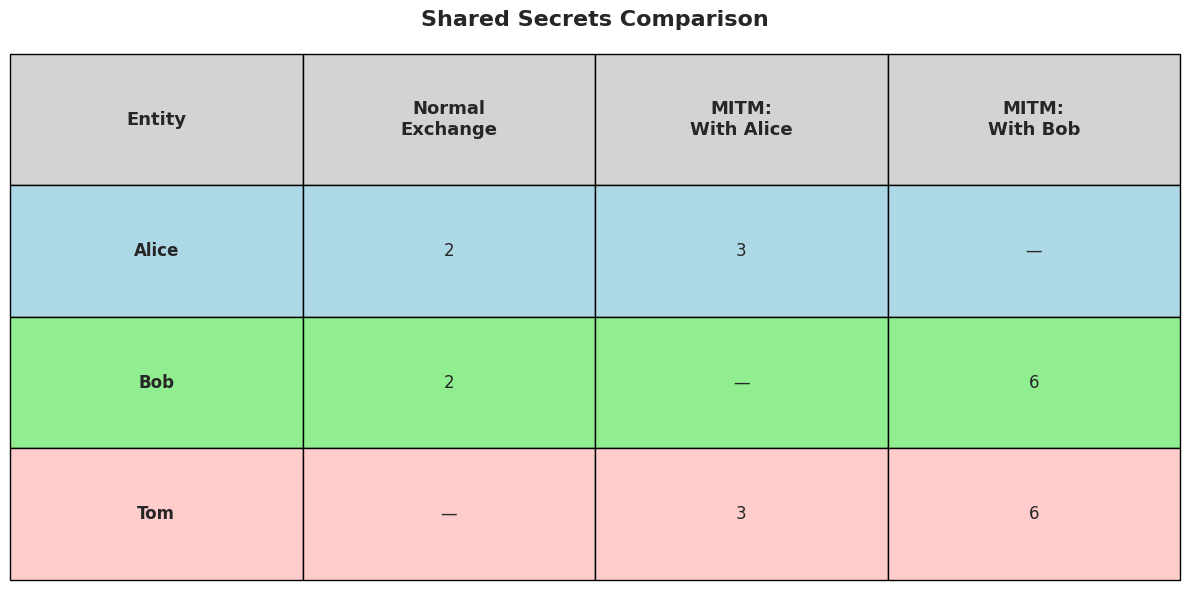

In [8]:
# =============================================================================
# COMPARISON TABLE
# =============================================================================

print("\n\n" + "="*70)
print("COMPARISON TABLE")
print("="*70)

comparison_data = {
    'Entity': ['Alice', 'Bob', 'Tom'],
    'Normal Exchange': [alice_secret, bob_secret, 'N/A'],
    'MITM - Alice Secret': [alice_secret_mitm, 'N/A', tom_alice_secret],
    'MITM - Bob Secret': ['N/A', bob_secret_mitm, tom_bob_secret]
}

# Create table visualization
fig3, ax3 = plt.subplots(1, 1, figsize=(12, 6))
ax3.axis('tight')
ax3.axis('off')

table_data = [
    ['Entity', 'Normal\nExchange', 'MITM:\nWith Alice', 'MITM:\nWith Bob'],
    ['Alice', f'{alice_secret}', f'{alice_secret_mitm}', '—'],
    ['Bob', f'{bob_secret}', '—', f'{bob_secret_mitm}'],
    ['Tom', '—', f'{tom_alice_secret}', f'{tom_bob_secret}']
]

colors = [['lightgray']*4,
          ['lightblue']*4,
          ['lightgreen']*4,
          ['#ffcccc']*4]

table = ax3.table(cellText=table_data, cellLoc='center', loc='center',
                 cellColours=colors, bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 3)

# Bold header
for i in range(4):
    table[(0, i)].set_text_props(weight='bold', fontsize=13)

# Bold first column
for i in range(4):
    table[(i, 0)].set_text_props(weight='bold')

ax3.set_title('Shared Secrets Comparison', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('diffie_hellman_comparison.png', dpi=300, bbox_inches='tight')
print("💾 Comparison table saved as 'diffie_hellman_comparison.png'")
plt.show()



In [9]:
# =============================================================================
# FINAL SUMMARY
# =============================================================================

print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
print("\n✅ NORMAL EXCHANGE:")
print(f"  - Alice and Bob share the same key: {alice_secret}")
print(f"  - Communication is secure")

print("\n❌ MAN-IN-THE-MIDDLE ATTACK:")
print(f"  - Alice's key (with Tom): {alice_secret_mitm}")
print(f"  - Bob's key (with Tom): {bob_secret_mitm}")
print(f"  - Keys are DIFFERENT: {alice_secret_mitm} ≠ {bob_secret_mitm}")
print(f"  - Tom can intercept and decrypt all messages")
print(f"  - Alice and Bob don't realize they're compromised")

print("\n🛡️  DEFENSE:")
print("  - Use digital signatures for authentication")
print("  - Use certificates (PKI)")
print("  - Use pre-shared secrets")
print("="*70)


FINAL SUMMARY

✅ NORMAL EXCHANGE:
  - Alice and Bob share the same key: 2
  - Communication is secure

❌ MAN-IN-THE-MIDDLE ATTACK:
  - Alice's key (with Tom): 3
  - Bob's key (with Tom): 6
  - Keys are DIFFERENT: 3 ≠ 6
  - Tom can intercept and decrypt all messages
  - Alice and Bob don't realize they're compromised

🛡️  DEFENSE:
  - Use digital signatures for authentication
  - Use certificates (PKI)
  - Use pre-shared secrets
